In [5]:
!pip install catboost

In [6]:
!pip install eli5

In [7]:
from google.colab import drive
drive.mount('/content/drive')

In [8]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [9]:
pd.options.display.float_format = '{:.2f}'.format 
plt.rcParams['font.family'] = 'Malgun Gothic'

In [10]:
# 데이터 로드
train = pd.read_csv("train.csv")
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

## 데이터 확인

In [11]:
train.head()

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken
0,1,28.00,Company Invited,1,10.00,Small Business,Male,3,4.00,Basic,3.00,Married,3.00,0,1,0,1.00,Executive,20384.00,0
1,2,34.00,Self Enquiry,3,NaN,Small Business,Female,2,4.00,Deluxe,4.00,Single,1.00,1,5,1,0.00,Manager,19599.00,1
2,3,45.00,Company Invited,1,NaN,Salaried,Male,2,3.00,Deluxe,4.00,Married,2.00,0,4,1,0.00,Manager,NaN,0
3,4,29.00,Company Invited,1,7.00,Small Business,Male,3,5.00,Basic,4.00,Married,3.00,0,4,0,1.00,Executive,21274.00,1
4,5,42.00,Self Enquiry,3,6.00,Salaried,Male,2,3.00,Deluxe,3.00,Divorced,2.00,0,3,1,0.00,Manager,19907.00,0


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1955 entries, 0 to 1954
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1955 non-null   int64  
 1   Age                       1861 non-null   float64
 2   TypeofContact             1945 non-null   object 
 3   CityTier                  1955 non-null   int64  
 4   DurationOfPitch           1853 non-null   float64
 5   Occupation                1955 non-null   object 
 6   Gender                    1955 non-null   object 
 7   NumberOfPersonVisiting    1955 non-null   int64  
 8   NumberOfFollowups         1942 non-null   float64
 9   ProductPitched            1955 non-null   object 
 10  PreferredPropertyStar     1945 non-null   float64
 11  MaritalStatus             1955 non-null   object 
 12  NumberOfTrips             1898 non-null   float64
 13  Passport                  1955 non-null   int64  
 14  PitchSat

In [13]:
train.describe()

,id,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome,ProdTaken
count,1955.00,1861.00,1955.00,1853.00,1955.00,1942.00,1945.00,1898.00,1955.00,1955.00,1955.00,1928.00,1855.00,1955.00
mean,978.00,37.46,1.64,15.52,2.92,3.72,3.57,3.26,0.29,3.07,0.62,1.21,23624.11,0.20
std,564.50,9.19,0.91,8.15,0.71,1.00,0.79,1.81,0.45,1.37,0.49,0.86,5640.48,0.40
min,1.00,18.00,1.00,5.00,1.00,1.00,3.00,1.00,0.00,1.00,0.00,0.00,1000.00,0.00
25%,489.50,31.00,1.00,9.00,2.00,3.00,3.00,2.00,0.00,2.00,0.00,1.00,20390.00,0.00
50%,978.00,36.00,1.00,14.00,3.00,4.00,3.00,3.00,0.00,3.00,1.00,1.00,22295.00,0.00
75%,1466.50,43.00,3.00,20.00,3.00,4.00,4.00,4.00,1.00,4.00,1.00,2.00,25558.00,0.00
max,1955.00,61.00,3.00,36.00,5.00,6.00,5.00,19.00,1.00,5.00,1.00,3.00,98678.00,1.00


In [14]:
test.describe()

,id,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,2933.00,2801.00,2933.00,2784.00,2933.00,2901.00,2917.00,2850.00,2933.00,2933.00,2933.00,2894.00,2800.00
mean,1467.00,37.73,1.66,15.47,2.89,3.70,3.59,3.22,0.29,3.09,0.62,1.17,23617.03
std,846.83,9.40,0.92,8.76,0.73,1.00,0.80,1.87,0.45,1.36,0.49,0.86,5202.48
min,1.00,18.00,1.00,5.00,1.00,1.00,3.00,1.00,0.00,1.00,0.00,0.00,4678.00
25%,734.00,31.00,1.00,9.00,2.00,3.00,3.00,2.00,0.00,2.00,0.00,1.00,20295.75
50%,1467.00,36.00,1.00,13.00,3.00,4.00,3.00,3.00,0.00,3.00,1.00,1.00,22369.50
75%,2200.00,44.00,3.00,20.00,3.00,4.00,4.00,4.00,1.00,4.00,1.00,2.00,25580.00
max,2933.00,61.00,3.00,127.00,5.00,6.00,5.00,22.00,1.00,5.00,1.00,3.00,38677.00


결측치 확인

In [15]:
def check_missing_col(dataframe):
    missing_col = []
    counted_missing_col = 0
    for i,col in enumerate(dataframe.columns):
        missing_values = sum(dataframe[col].isna())
        is_missing = True if missing_values >= 1 else False
        if is_missing:
            counted_missing_col +=1
            print('결측치가 있는 칼럼은: %s입니다.'%col)
            print('해당 칼럼에 총 %s개의 결측치가 존재합니다. '%missing_values)
            missing_col.append([col, dataframe[col].dtype])
    if counted_missing_col == 0:
        print('결측치가 존재하지 않습니다.')
    return missing_col

missing_col = check_missing_col(train)

결측치가 있는 칼럼은: Age입니다.
해당 칼럼에 총 94개의 결측치가 존재합니다. 
결측치가 있는 칼럼은: TypeofContact입니다.
해당 칼럼에 총 10개의 결측치가 존재합니다. 
결측치가 있는 칼럼은: DurationOfPitch입니다.
해당 칼럼에 총 102개의 결측치가 존재합니다. 
결측치가 있는 칼럼은: NumberOfFollowups입니다.
해당 칼럼에 총 13개의 결측치가 존재합니다. 
결측치가 있는 칼럼은: PreferredPropertyStar입니다.
해당 칼럼에 총 10개의 결측치가 존재합니다. 
결측치가 있는 칼럼은: NumberOfTrips입니다.
해당 칼럼에 총 57개의 결측치가 존재합니다. 
결측치가 있는 칼럼은: NumberOfChildrenVisiting입니다.
해당 칼럼에 총 27개의 결측치가 존재합니다. 
결측치가 있는 칼럼은: MonthlyIncome입니다.
해당 칼럼에 총 100개의 결측치가 존재합니다. 


In [16]:
missing_col = check_missing_col(test)

결측치가 있는 칼럼은: Age입니다.
해당 칼럼에 총 132개의 결측치가 존재합니다. 
결측치가 있는 칼럼은: TypeofContact입니다.
해당 칼럼에 총 15개의 결측치가 존재합니다. 
결측치가 있는 칼럼은: DurationOfPitch입니다.
해당 칼럼에 총 149개의 결측치가 존재합니다. 
결측치가 있는 칼럼은: NumberOfFollowups입니다.
해당 칼럼에 총 32개의 결측치가 존재합니다. 
결측치가 있는 칼럼은: PreferredPropertyStar입니다.
해당 칼럼에 총 16개의 결측치가 존재합니다. 
결측치가 있는 칼럼은: NumberOfTrips입니다.
해당 칼럼에 총 83개의 결측치가 존재합니다. 
결측치가 있는 칼럼은: NumberOfChildrenVisiting입니다.
해당 칼럼에 총 39개의 결측치가 존재합니다. 
결측치가 있는 칼럼은: MonthlyIncome입니다.
해당 칼럼에 총 133개의 결측치가 존재합니다. 


## 인코딩

Gender 칼럼에서 'Fe Male'은 'Female'로 변경

MaritalStatus 칼럼의 Unmarried와 Single의 처리 방안에 대해서도 고민해보았지만,  
여행상품을 신청하는데에 있어 완전히 같은 의미라고는 판단하지 않아 따로 처리를 해주진 않음(실제로 처리를 해주지 않는 것이 더 나은 성능을 보이는 것으로 보임)

In [17]:
train['Gender'].replace({'Fe Male': 'Female'}, inplace=True)
test['Gender'].replace({'Fe Male': 'Female'}, inplace=True)

인코딩 과정에서 결측치를 유지하기 위해 칼럼을 나누어서 인코딩

In [18]:
# 결측치 없는 object칼럼
features = ['Occupation', 'ProductPitched', 'MaritalStatus', 'Designation','Gender']

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
# train을 먼저 인코딩해서 transform을 시키면 이후 test 인코딩 할때 fit을 못하기 때문에 test를 먼저 인코딩 해줌
# train 먼저 인코딩 후 새로운 변수에 할당하는 방법도 있지만 굳이 싶어서 하지 않음

# 결측치 없는 object칼럼들 인코딩
for o_col in features:
    encoder = LabelEncoder()
    encoder.fit(train[o_col])
    test[o_col] = encoder.transform(test[o_col])

In [21]:
# 모든 문자형 변수에 대해 encoder를 적용
for o_col in features:
    encoder = LabelEncoder()
    encoder.fit(train[o_col])
    train[o_col] = encoder.transform(train[o_col])

In [22]:
# 결측치 있는 TypeofContact칼럼 결측치 제외하고 따로 인코딩 
train['TypeofContact'][train['TypeofContact']=='Self Enquiry'] = 1
train['TypeofContact'][train['TypeofContact']=='Company Invited'] = 0

test['TypeofContact'][test['TypeofContact']=='Self Enquiry'] = 1
test['TypeofContact'][test['TypeofContact']=='Company Invited'] = 0

In [23]:
# 결측치 제외하고 숫자형으로 바꿔주기
train['TypeofContact'] = train['TypeofContact'].apply(pd.to_numeric, errors='coerce')
test['TypeofContact'] = test['TypeofContact'].apply(pd.to_numeric, errors='coerce')

In [24]:
missing_col = check_missing_col(train)

결측치가 있는 칼럼은: Age입니다.
해당 칼럼에 총 94개의 결측치가 존재합니다. 
결측치가 있는 칼럼은: TypeofContact입니다.
해당 칼럼에 총 10개의 결측치가 존재합니다. 
결측치가 있는 칼럼은: DurationOfPitch입니다.
해당 칼럼에 총 102개의 결측치가 존재합니다. 
결측치가 있는 칼럼은: NumberOfFollowups입니다.
해당 칼럼에 총 13개의 결측치가 존재합니다. 
결측치가 있는 칼럼은: PreferredPropertyStar입니다.
해당 칼럼에 총 10개의 결측치가 존재합니다. 
결측치가 있는 칼럼은: NumberOfTrips입니다.
해당 칼럼에 총 57개의 결측치가 존재합니다. 
결측치가 있는 칼럼은: NumberOfChildrenVisiting입니다.
해당 칼럼에 총 27개의 결측치가 존재합니다. 
결측치가 있는 칼럼은: MonthlyIncome입니다.
해당 칼럼에 총 100개의 결측치가 존재합니다. 


In [25]:
# 인코딩 확인
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1955 entries, 0 to 1954
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1955 non-null   int64  
 1   Age                       1861 non-null   float64
 2   TypeofContact             1945 non-null   float64
 3   CityTier                  1955 non-null   int64  
 4   DurationOfPitch           1853 non-null   float64
 5   Occupation                1955 non-null   int64  
 6   Gender                    1955 non-null   int64  
 7   NumberOfPersonVisiting    1955 non-null   int64  
 8   NumberOfFollowups         1942 non-null   float64
 9   ProductPitched            1955 non-null   int64  
 10  PreferredPropertyStar     1945 non-null   float64
 11  MaritalStatus             1955 non-null   int64  
 12  NumberOfTrips             1898 non-null   float64
 13  Passport                  1955 non-null   int64  
 14  PitchSat

## 스케일링

최종적으로 tree기반의 catboost를 사용하기 때문에 스케일링의 영향은 거의 없을 것이라 생각함  
하지만 결측치를 채우는 과정에서 거리기반 알고리즘 knn을 사용하기 때문에 스케일링이 필요하다고 판단함

In [26]:
# 로그변환 
train['DurationOfPitch'] = np.log1p(train['DurationOfPitch'])
test['DurationOfPitch'] = np.log1p(test['DurationOfPitch'])

train['MonthlyIncome'] = np.log1p(train['MonthlyIncome'])
test['MonthlyIncome'] = np.log1p(test['MonthlyIncome'])

In [27]:
# 변환된 값 확인
train.describe()

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken
count,1955.00,1861.00,1945.00,1955.00,1853.00,1955.00,1955.00,1955.00,1942.00,1955.00,1945.00,1955.00,1898.00,1955.00,1955.00,1955.00,1928.00,1955.00,1855.00,1955.00
mean,978.00,37.46,0.71,1.64,2.69,2.34,0.62,2.92,3.72,1.17,3.57,1.28,3.26,0.29,3.07,0.62,1.21,1.73,10.05,0.20
std,564.50,9.19,0.45,0.91,0.47,0.63,0.49,0.71,1.00,1.27,0.79,0.93,1.81,0.45,1.37,0.49,0.86,0.95,0.22,0.40
min,1.00,18.00,0.00,1.00,1.79,0.00,0.00,1.00,1.00,0.00,3.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,6.91,0.00
25%,489.50,31.00,0.00,1.00,2.30,2.00,0.00,2.00,3.00,0.00,3.00,1.00,2.00,0.00,2.00,0.00,1.00,1.00,9.92,0.00
50%,978.00,36.00,1.00,1.00,2.71,2.00,1.00,3.00,4.00,1.00,3.00,1.00,3.00,0.00,3.00,1.00,1.00,2.00,10.01,0.00
75%,1466.50,43.00,1.00,3.00,3.04,3.00,1.00,3.00,4.00,2.00,4.00,2.00,4.00,1.00,4.00,1.00,2.00,2.00,10.15,0.00
max,1955.00,61.00,1.00,3.00,3.61,3.00,1.00,5.00,6.00,4.00,5.00,3.00,19.00,1.00,5.00,1.00,3.00,4.00,11.50,1.00


## 이상치 처리

MonthlyIncome칼럼은 추후 모델에 반영하지 않으므로 이상치 처리 안해줌

이상치를 처리할 때 IQR을 활용하였지만, boxplot기준으로 이상치로 분류된다 하더라도   
칼럼의 특성을 파악해 이상치로 판단되지 않으면 처리하지 않았음


In [28]:
# train과 test를 통합해 이상치 처리 해준 후 다시 분할
total_data = pd.concat([train,test])
total_data = total_data.reset_index()

In [29]:
import seaborn as sns
plt.figure(figsize=(15,8))

<Figure size 1080x576 with 0 Axes>

<Figure size 1080x576 with 0 Axes>

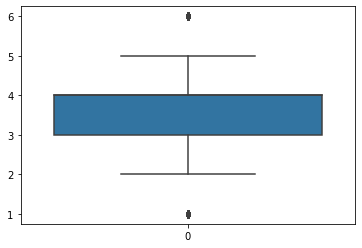

In [30]:
sns.boxplot(data=total_data['NumberOfFollowups'])

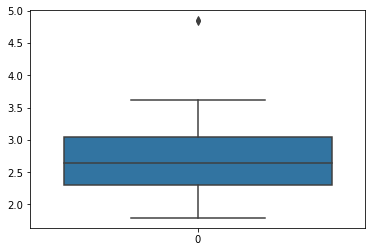

In [31]:
sns.boxplot(data=total_data['DurationOfPitch'])

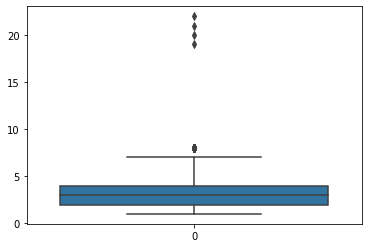

In [32]:
sns.boxplot(data=total_data['NumberOfTrips'])

In [33]:
# 이상치들 상한값, 하한값으로 대체
def outlier(df):
    IQR = df.quantile(0.75) - df.quantile(0.25)
    line_down = df.quantile(0.25) - IQR*1.5
    line_up = df.quantile(0.75) + IQR*1.5

    df = df.clip(line_down, line_up)

    return df

total_data['DurationOfPitch'] = outlier(total_data['DurationOfPitch'])
total_data['NumberOfTrips'] = outlier(total_data['NumberOfTrips'])

In [34]:
train = total_data[~total_data['ProdTaken'].isnull()]
test = total_data[total_data['ProdTaken'].isnull()]
test = test.drop('ProdTaken',axis=1)

In [35]:
train = train.drop(['index'],axis=1)
test = test.drop(['index'],axis=1)

## 결측치 처리

본 대회를 진행하면서 결측치를 채우는 방안에 대해 많은 고민을 하였다.   
각 칼럼마다의 특성을 파악해서 평균, 중앙값, 최빈값 등으로 채우는 방향으로 진행해보고  
여러 알고리즘을 활용해 채워보았지만, 결국 knn을 이용해 결측치를 채우는 방식이 가장 성능이 높게 나왔기에 채택하였다.


결측치를 충분한 근거를 가지고 처리하지 못한점이 아쉬움으로 남는다.  
(원래 완벽한 근거를 가지고 진행할 수는 없는가싶기도 하다..)

In [36]:
# 불필요한 id 칼럼 제거
train = train.drop(['id'],axis= 1)
test = test.drop(['id'],axis= 1)

In [37]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=3)
imputed= imputer.fit_transform(train)
train = pd.DataFrame(imputed, columns=train.columns)

In [38]:
imputer = KNNImputer(n_neighbors=3)

test_copy = test.copy()
train_drop = train.drop('ProdTaken', axis=1)
imputer.fit(train_drop)   # 여기서도 data leakage에 조심하자
test = imputer.transform(test)

test = pd.DataFrame(test, columns=test_copy.columns)

In [39]:
missing_col = check_missing_col(train)
missing_col = check_missing_col(test)

결측치가 존재하지 않습니다.
결측치가 존재하지 않습니다.


## Age 범주 변환


Age 칼럼에 대해 범주화가 꼭 필요한가? 라는 질문에 대해서는 확실히 답하기 어렵다고 생각한다.  
하지만 범주화를 함으로써 과적합을 예방하고, 모델 해석측면에서 도움이 된다고 판단해 진행했다.

In [40]:
train['Age'].value_counts().sort_index()

18.00     5
19.00    16
20.00    13
21.00    17
22.00    20
         ..
57.00     9
58.00    11
59.00    14
60.00    12
61.00     3
Name: Age, Length: 75, dtype: int64

In [41]:
bins = list(range(15, 71, 10))
bins_label = [str(x)+"이상 "+str(x+10)+"미만" for x in bins]
train["Age_level"] = pd.cut(train["Age"], bins, right=False, labels=bins_label[:-1])

test["Age_level"] = pd.cut(test["Age"], bins, right=False, labels=bins_label[:-1])

In [42]:
train = train.drop(['Age'],axis= 1)
test = test.drop(['Age'],axis= 1)

In [43]:
train['Age_level'].value_counts().sort_index()

15이상 25미만    120
25이상 35미만    697
35이상 45미만    719
45이상 55미만    330
55이상 65미만     89
Name: Age_level, dtype: int64

In [44]:
test['Age_level'].value_counts().sort_index()

15이상 25미만     160
25이상 35미만    1078
35이상 45미만    1020
45이상 55미만     500
55이상 65미만     175
Name: Age_level, dtype: int64

## Age_level 인코딩

범주화를 한 Age_level 칼럼에 대한 인코딩을 진행

In [45]:
encoder = LabelEncoder() 
encoder.fit(train['Age_level'])
test['Age_level'] = encoder.transform(test['Age_level'])

In [46]:
encoder = LabelEncoder()
encoder.fit(train['Age_level'])
train['Age_level'] = encoder.transform(train['Age_level'])

## Feature Selection

In [47]:
# PermutationImportance 기반으로 중요도 낮다고 판단되는 칼럼 삭제
X = train.drop(['ProdTaken','NumberOfChildrenVisiting','MonthlyIncome','NumberOfPersonVisiting'],axis= 1)
y = train['ProdTaken']

test = test.drop(['NumberOfChildrenVisiting','MonthlyIncome','NumberOfPersonVisiting'],axis= 1)

X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2, random_state=42)

In [48]:
print('학습 데이터 레이블 값 비율')
print(y_train.value_counts()/y_train.shape[0] * 100)
print('테스트 데이터 레이블 값 비율')
print(y_test.value_counts()/y_test.shape[0] * 100)


학습 데이터 레이블 값 비율
0.00   81.33
1.00   18.67
Name: ProdTaken, dtype: float64
테스트 데이터 레이블 값 비율
0.00   76.73
1.00   23.27
Name: ProdTaken, dtype: float64


In [49]:
# 레이블이 불균형한 데이터임을 확인할 수 있음
train['ProdTaken'].value_counts(normalize = True)

0.00   0.80
1.00   0.20
Name: ProdTaken, dtype: float64

불균형 데이터 처리 방안에 대해 고민을 많이 하였다.   
SMOTE, ADASYN 등과 같은 오버샘플링 기법들을 사용해보았지만 성능을 향상시키지 못하였다.  
따라서 클래스별로 가중치를 다르게 부여하는 class_weight방법을 사용했다. (미미하지만 성능을 향상시킬 수 있었다)


## CatBoost

In [50]:
from sklearn.utils.class_weight import compute_class_weight

# 불균형한 클래스인 것으로 확인되어 class_weight = 'balanced'로 설정해준다. 
classes = np.unique(y_train)
weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weights = dict(zip(classes, weights))

In [51]:
from catboost import CatBoostClassifier

In [52]:
from sklearn.model_selection import cross_val_score
cb = CatBoostClassifier(learning_rate= 0.03, max_depth= 10, n_estimators= 1000, 
                    class_weights= class_weights, subsample = 0.8, colsample_bylevel=1.0, random_state=42, verbose =0)

# 성능 지표는 정확도(accuracy) , 교차 검증 세트는 5개 
scores = cross_val_score(cb , X, y, scoring='accuracy',cv=5)

print('교차 검증별 정확도:',np.round(scores, 4))
print('평균 검증 정확도:', np.round(np.mean(scores),4))

교차 검증별 정확도: [0.9488 0.9105 0.9258 0.913  0.9386]
평균 검증 정확도: 0.9274


## PermutationImportance

In [53]:
import eli5
from eli5.sklearn import PermutationImportance

cb = CatBoostClassifier(learning_rate= 0.03, max_depth= 10, n_estimators= 1000, 
                    class_weights= class_weights, subsample = 0.8, colsample_bylevel=1.0, random_state=42, verbose =0).fit(X_train, y_train)
perm = PermutationImportance(cb, random_state= 42).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.0895 ± 0.0222,Passport
0.0430 ± 0.0127,ProductPitched
0.0399 ± 0.0147,DurationOfPitch
0.0399 ± 0.0083,PitchSatisfactionScore
0.0389 ± 0.0166,MaritalStatus
0.0379 ± 0.0169,PreferredPropertyStar
0.0373 ± 0.0124,CityTier
0.0363 ± 0.0123,Occupation
0.0332 ± 0.0125,TypeofContact
0.0220 ± 0.0173,NumberOfTrips


## 제출

In [ ]:
cb = CatBoostClassifier(learning_rate= 0.03, max_depth= 10, n_estimators= 1000, 
                    class_weights= class_weights, subsample = 0.8, colsample_bylevel=1.0, random_state=42, verbose =0)
 
cb.fit(X, y)

pred = cb.predict(test)

In [ ]:
submission['ProdTaken'] = pred
submission.to_csv('submission.csv', index=False)
submission